In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# uploading the file!!

df = pd.read_csv('../Downloads/top_1000_tiktokers.csv')

In [3]:
df.head()

,Rank,Username,Tiktok Link,Name,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
0,1,badbunny,https://www.tiktok.com/@badbunny,Bad Bunny,23.4M,63.1M,10.3M,65.2K,108.6K
1,2,noahschnapp,https://www.tiktok.com/@noahschnapp,Noah Schnapp,26.1M,23.4M,4.8M,46.7K,22.1K
2,3,khaby.lame,https://www.tiktok.com/@khaby.lame,Khabane lame,145.9M,47.5M,2.5M,46K,9.4K
3,4,coopernoriega,https://www.tiktok.com/@coopernoriega,Cooper Noriega,3.2M,31M,1.3M,120.9K,8.4K
4,5,avrillavigne,https://www.tiktok.com/@avrillavigne,Avril Lavigne,4M,24.7M,3.5M,32.1K,22.7K


In [4]:
# observing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rank               1000 non-null   int64 
 1   Username           1000 non-null   object
 2   Tiktok Link        1000 non-null   object
 3   Name               998 non-null    object
 4   Subscribers Count  1000 non-null   object
 5   Views. Avg         1000 non-null   object
 6   Likes. Avg         1000 non-null   object
 7   Comments. Avg      1000 non-null   object
 8   Shares. Avg        1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Rank
count,1000.000000
mean,500.500000
std,288.819436
min,1.000000
25%,250.750000
50%,500.500000
75%,750.250000
max,1000.000000


In [6]:
# checking if we have missing data!!

df.isna().sum()

Rank                 0
Username             0
Tiktok Link          0
Name                 2
Subscribers Count    0
Views. Avg           0
Likes. Avg           0
Comments. Avg        0
Shares. Avg          0
dtype: int64

In [7]:
# drop that missing values in the name column
df = df.dropna(axis=0)
df.isna().sum()

Rank                 0
Username             0
Tiktok Link          0
Name                 0
Subscribers Count    0
Views. Avg           0
Likes. Avg           0
Comments. Avg        0
Shares. Avg          0
dtype: int64

# EDA

In [8]:
df.head()

,Rank,Username,Tiktok Link,Name,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
0,1,badbunny,https://www.tiktok.com/@badbunny,Bad Bunny,23.4M,63.1M,10.3M,65.2K,108.6K
1,2,noahschnapp,https://www.tiktok.com/@noahschnapp,Noah Schnapp,26.1M,23.4M,4.8M,46.7K,22.1K
2,3,khaby.lame,https://www.tiktok.com/@khaby.lame,Khabane lame,145.9M,47.5M,2.5M,46K,9.4K
3,4,coopernoriega,https://www.tiktok.com/@coopernoriega,Cooper Noriega,3.2M,31M,1.3M,120.9K,8.4K
4,5,avrillavigne,https://www.tiktok.com/@avrillavigne,Avril Lavigne,4M,24.7M,3.5M,32.1K,22.7K


In [137]:
# Replacing symbols K and M into numerics^^

def symbol(x):
    if type(x)==float or type(x)== int:
        return x
    if 'M' in x:
        if len(x)>1:
            return float(x.replace('M',''))*1000000
        return 1000000.0
    if 'K' in x:
        if len(x)>1:
            return float(x.replace('K',''))*1000
        return 1000.0

In [10]:
df['Subscribers Count'] = df['Subscribers Count'].apply(symbol)
df['Views. Avg'] = df['Views. Avg'].apply(symbol)
df['Likes. Avg'] = df['Likes. Avg'].apply(symbol)
df['Comments. Avg'] = df['Comments. Avg'].apply(symbol)
df['Shares. Avg'] = df['Shares. Avg'].apply(symbol)
df.head()

,Rank,Username,Tiktok Link,Name,Subscribers Count,Views. Avg,Likes. Avg,Comments. Avg,Shares. Avg
0,1,badbunny,https://www.tiktok.com/@badbunny,Bad Bunny,23400000.0,63100000.0,10300000.0,65200.0,108600.0
1,2,noahschnapp,https://www.tiktok.com/@noahschnapp,Noah Schnapp,26100000.0,23400000.0,4800000.0,46700.0,22100.0
2,3,khaby.lame,https://www.tiktok.com/@khaby.lame,Khabane lame,145900000.0,47500000.0,2500000.0,46000.0,9400.0
3,4,coopernoriega,https://www.tiktok.com/@coopernoriega,Cooper Noriega,3200000.0,31000000.0,1300000.0,120900.0,8400.0
4,5,avrillavigne,https://www.tiktok.com/@avrillavigne,Avril Lavigne,4000000.0,24700000.0,3500000.0,32100.0,22700.0


In [11]:
sub = df.value_counts('Subscribers Count')
sub.head(10)

Subscribers Count
1900000.0    23
2100000.0    22
1700000.0    17
1600000.0    16
1100000.0    16
1300000.0    16
2300000.0    16
1400000.0    16
1200000.0    15
2000000.0    14
dtype: int64

<BarContainer object of 10 artists>

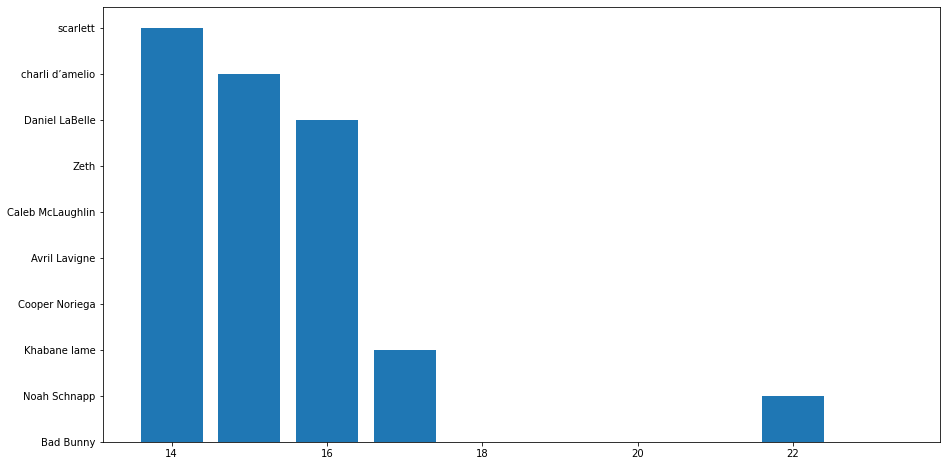

In [12]:
plt.figure(figsize=(15,8))
plt.bar(sub.values[:10], df['Name'][:10])

In [135]:
def func(df, x, y):
    fig,axes = plt.subplots(1,1,figsize=(15, 8))
    axes.set_title(y)
    axes.set_ylabel(y)
    axes.set_xlabel(x)
    axes.set_xticklabels(df[x].unique(), rotation=45)
    sns.barplot(x, y, data=df, linewidth=2)
    axes.legend()


C:\Users\ibroh\AppData\Local\Temp\ipykernel_15164\3059883672.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(df[x].unique(), rotation=45)
C:\Users\ibroh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


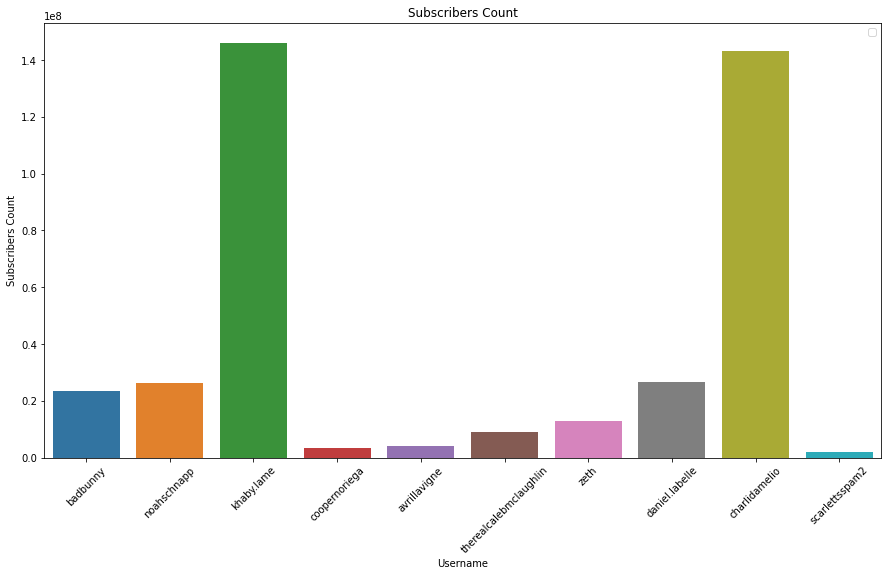

In [136]:
func(df[:10], 'Username', 'Subscribers Count')